In [28]:
# from sklearn import linear_model
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd
from sklearn.model_selection import train_test_split

In [29]:
insurance_data = pd.read_csv("insurance.csv")

X = insurance_data.drop(columns=["charges"])
Y = insurance_data["charges"]

X = pd.get_dummies(X, columns=["region"], drop_first = True, dtype=int)

X["sex"] = X["sex"].map({"female": 1, "male": 0})
X["smoker"] = X["smoker"].map({"yes": 1, "no": 0})

X["age_smoker"] = X["age"] * X["smoker"]
X["bmi_smoker"] = X["bmi"] * X["smoker"]

X_train, X_test,Y_train,Y_test = train_test_split(
    X, Y, test_size=0.2, random_state=42
)


MSE for alpha=0.001:  20922599.87103596
MSE for alpha=0.1:  20921803.698431376
MSE for alpha=1:  20914832.63508914
MSE for alpha=2:  20908106.779954515
MSE for alpha=5:  20890881.000633497
MSE for alpha=10:  20872844.794796683
MSE for alpha=20:  20877828.53237883
MSE for alpha=30:  20937537.133939773
MSE for alpha=40:  21046489.29389078
MSE for alpha=50:  21196929.8696089
MSE for alpha=100:  22423172.686023254


<Axes: >

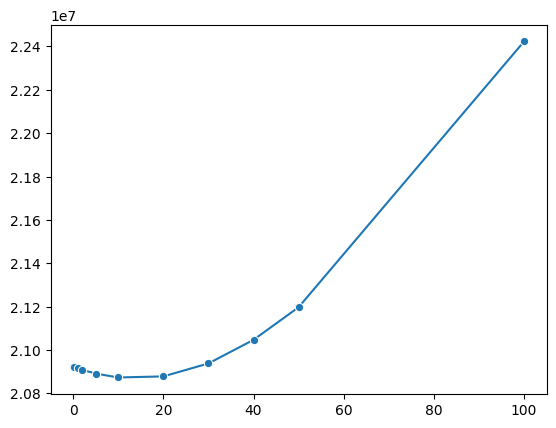

In [30]:
import seaborn as sns
alphas = [0.001, 0.1, 1, 2, 5, 10, 20, 30, 40, 50, 100]
mses = []
for a in alphas:
    lasso_model = Lasso(alpha=a)
    lasso_model.fit(X_train, Y_train)
    
    Y_pred = lasso_model.predict(X_test)
    mse = mean_squared_error(Y_test, Y_pred)
    print(f"MSE for alpha={a}: ", mse)
    mses.append(mse)

sns.lineplot(x=alphas, y=mses, marker="o")

In [32]:
#LassoCV  cross validation pure data par analyze kar ke fir best avg value di jati  simillarly RidgeCV also work 
from sklearn.linear_model import LassoCV
a = [0.001, 0.1, 1, 2, 5, 10, 20, 30, 40, 50, 100]

lasso_cv_model = LassoCV(
    alphas=a,
    cv=5,
    max_iter=1000,
    random_state=42
)

lasso_cv_model.fit(X_train, Y_train)

print("best alpha: ", lasso_cv_model.alpha_)

y_pred = lasso_cv_model.predict(X_test)
mse = mean_squared_error(Y_test, Y_pred)
r2 = r2_score(Y_test,Y_pred)
print("mse = ", mse)
print("r2 =", r2)

best alpha:  0.001
mse =  22423172.686023254
r2 = 0.8555661455616375


In [ ]:
#ElasticNet   padho khud se